# Clustering on Income Data

## Michelangelo Zampieri

Data set from kaggle [link](https://www.kaggle.com/datasets/aradhanahirapara/income-survey-finance-analysis?select=Income+Survey+Dataset.csv)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [36]:
df = pd.read_csv('/Users/michelangelozampieri/Desktop/Cluseting-Project/data/Income Survey Dataset.csv')
df.head()

PersonID    Weight  Province  MBMREGP  Age_gap  Gender  Marital_status  \
0         1  139.6500        59       38       15       2               3   
1         2  254.1041        35       17        9       1               1   
2         3  254.1041        35       17        9       2               1   
3         4  254.1041        35       17        4       1               4   
4         5  254.1041        35       17        3       1              96   

   Highschool  Highest_edu  Work_ref  ...  Pension  Self_emp_income.1  \
0           1            3         2  ...        0                  0   
1           1            2         1  ...        0                  0   
2           1            3         1  ...        0                  0   
3           2            1         1  ...        0                  0   
4           6            6         6  ...        0                  0   

   Total_income  Emp_insurance  Salary_wages  compensation  Family_mem  \
0         20275              0             0             0           1   
1        110875              0        106000             0           4   
2        110875              0        106000             0           4   
3        110875              0        106000             0           4   
4        110875              0        106000             0           4   

   CFCOMP    CONDMP     RENTM  
0       1  99999996  99999996  
1       4  99999996  99999996  
2       4  99999996  99999996  
3       4  99999996  99999996  
4       4  99999996  99999996  

[5 rows x 38 columns]

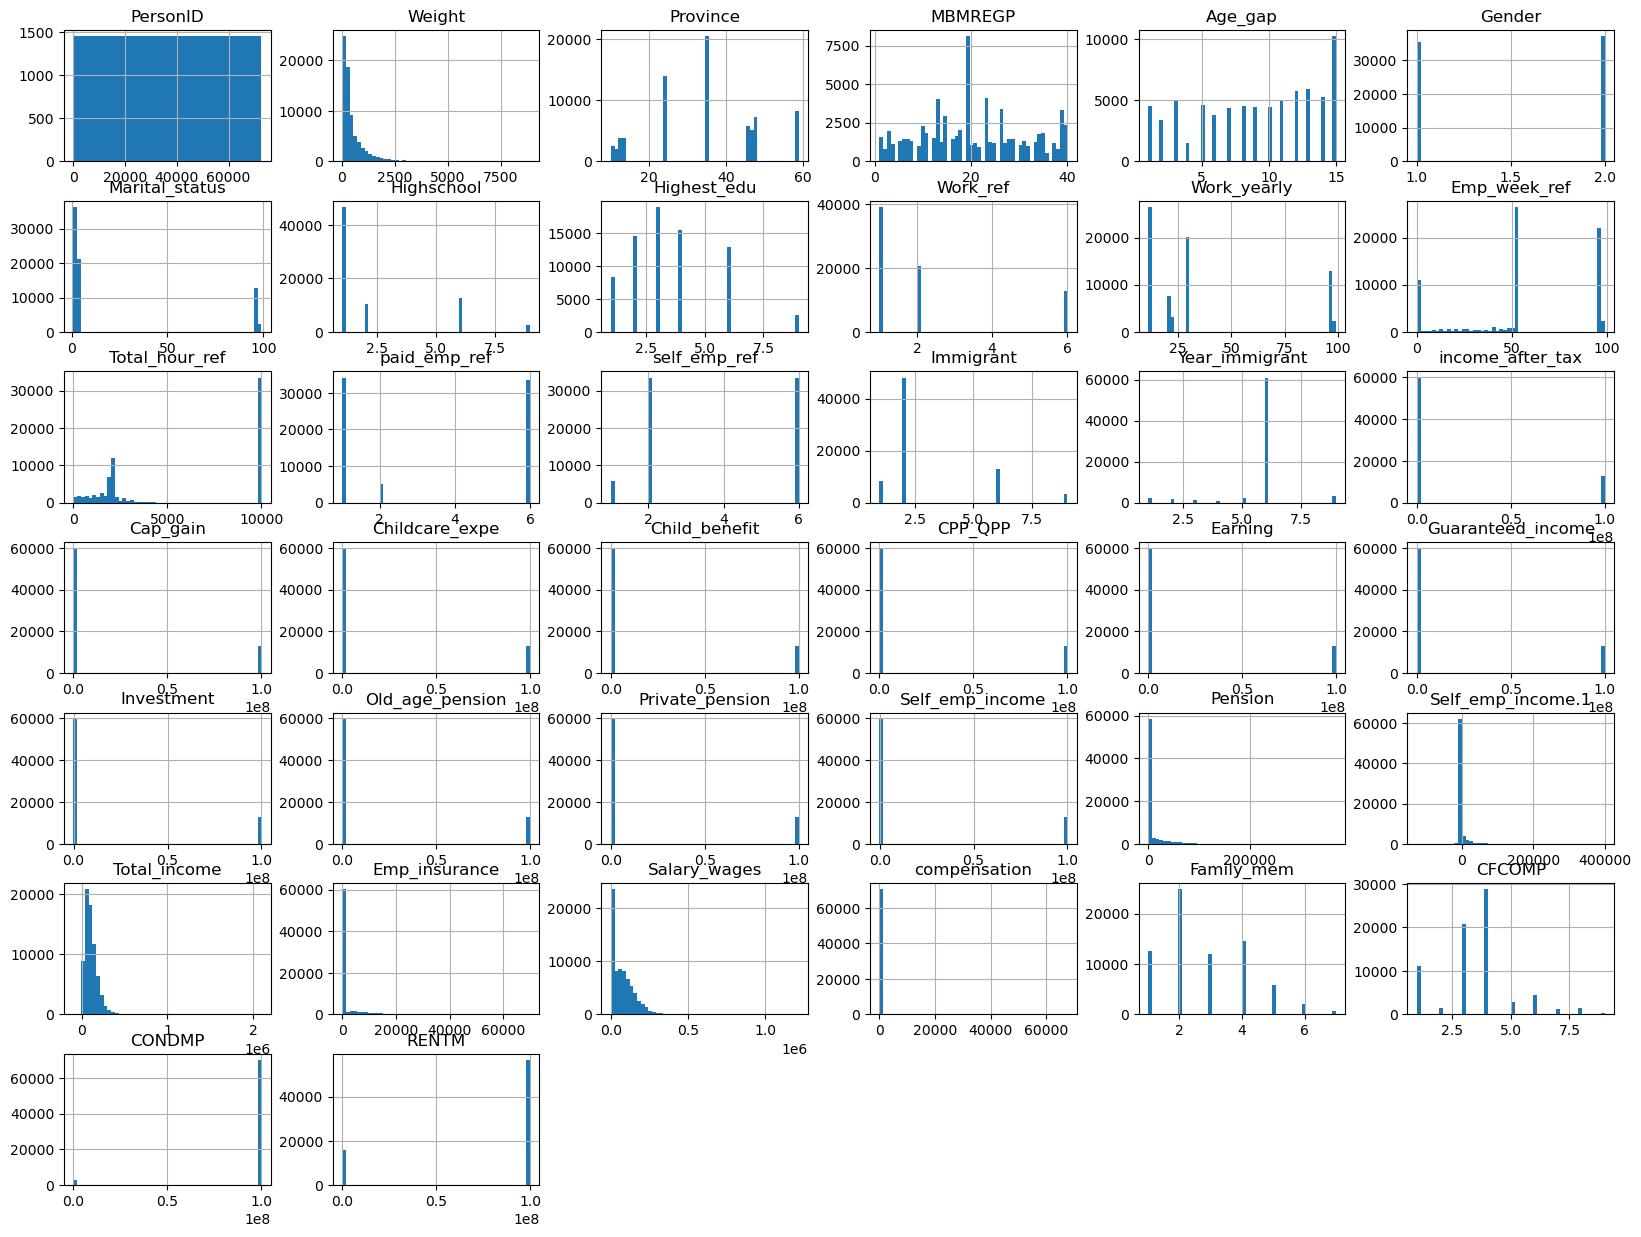

In [43]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Here I looked at the documentation of the data, also in `./data/README.md` to see what the features were, I noticed that many features were categorical so I decided to one-hot-encode them to keep them in the anlaysis and letting them have equal weight. 

In [ ]:
columns_to_encode = ['Province', 'MBMREGP',  'Gender', 'Age_gap', 'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref', 'Immigrant']
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df_encoded.head()

PersonID    Weight  Work_yearly  Emp_week_ref  Total_hour_ref  \
0         1  139.6500           30            96            9996   
1         2  254.1041           11            52            2080   
2         3  254.1041           11            52            2080   
3         4  254.1041           11            52            2080   
4         5  254.1041           96            96            9996   

   paid_emp_ref  self_emp_ref  Year_immigrant  income_after_tax  Cap_gain  \
0             6             6               6             20275         0   
1             1             2               6             61680         0   
2             1             2               6             26875         0   
3             1             2               6             14000         0   
4             6             6               6          99999996  99999996   

   ...  Highest_edu_2  Highest_edu_3  Highest_edu_4  Highest_edu_6  \
0  ...          False           True          False          False   
1  ...           True          False          False          False   
2  ...          False           True          False          False   
3  ...          False          False          False          False   
4  ...          False          False          False           True   

   Highest_edu_9  Work_ref_2  Work_ref_6  Immigrant_2  Immigrant_6  \
0          False        True       False         True        False   
1          False       False       False         True        False   
2          False       False       False         True        False   
3          False       False       False         True        False   
4          False       False        True        False         True   

   Immigrant_9  
0        False  
1        False  
2        False  
3        False  
4        False  

[5 rows x 110 columns]

There were alot of unqual scaled ,some were in the hundreds of millions, so standard sclaing should help with that

In [46]:
scaler = StandardScaler()
X = df_encoded.drop('PersonID', axis=1)
X = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X, columns=df_encoded.columns[1:])
df_scaled.head()

Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
0 -0.590332    -0.175617      1.184708        1.072182      1.075995   
1 -0.406412    -0.768257     -0.110376       -0.823443     -0.972304   
2 -0.406412    -0.768257     -0.110376       -0.823443     -0.972304   
3 -0.406412    -0.768257     -0.110376       -0.823443     -0.972304   
4 -0.406412     1.883027      1.184708        1.072182      1.075995   

   self_emp_ref  Year_immigrant  income_after_tax  Cap_gain  Childcare_expe  \
0      1.072879        0.166997         -0.463675 -0.463121       -0.463107   
1     -0.845456        0.166997         -0.462588 -0.463121       -0.463107   
2     -0.845456        0.166997         -0.463501 -0.463121       -0.463107   
3     -0.845456        0.166997         -0.463839 -0.463121       -0.463107   
4      1.072879        0.166997          2.159362  2.159363        2.159363   

   ...  Highest_edu_2  Highest_edu_3  Highest_edu_4  Highest_edu_6  \
0  ...      -0.498761       1.685438      -0.520325      -0.463100   
1  ...       2.004969      -0.593318      -0.520325      -0.463100   
2  ...      -0.498761       1.685438      -0.520325      -0.463100   
3  ...      -0.498761      -0.593318      -0.520325      -0.463100   
4  ...      -0.498761      -0.593318      -0.520325       2.159363   

   Highest_edu_9  Work_ref_2  Work_ref_6  Immigrant_2  Immigrant_6  \
0      -0.191549    1.586496   -0.463100     0.713504    -0.463100   
1      -0.191549   -0.630320   -0.463100     0.713504    -0.463100   
2      -0.191549   -0.630320   -0.463100     0.713504    -0.463100   
3      -0.191549   -0.630320   -0.463100     0.713504    -0.463100   
4      -0.191549   -0.630320    2.159363    -1.401533     2.159363   

   Immigrant_9  
0    -0.217769  
1    -0.217769  
2    -0.217769  
3    -0.217769  
4    -0.217769  

[5 rows x 109 columns]

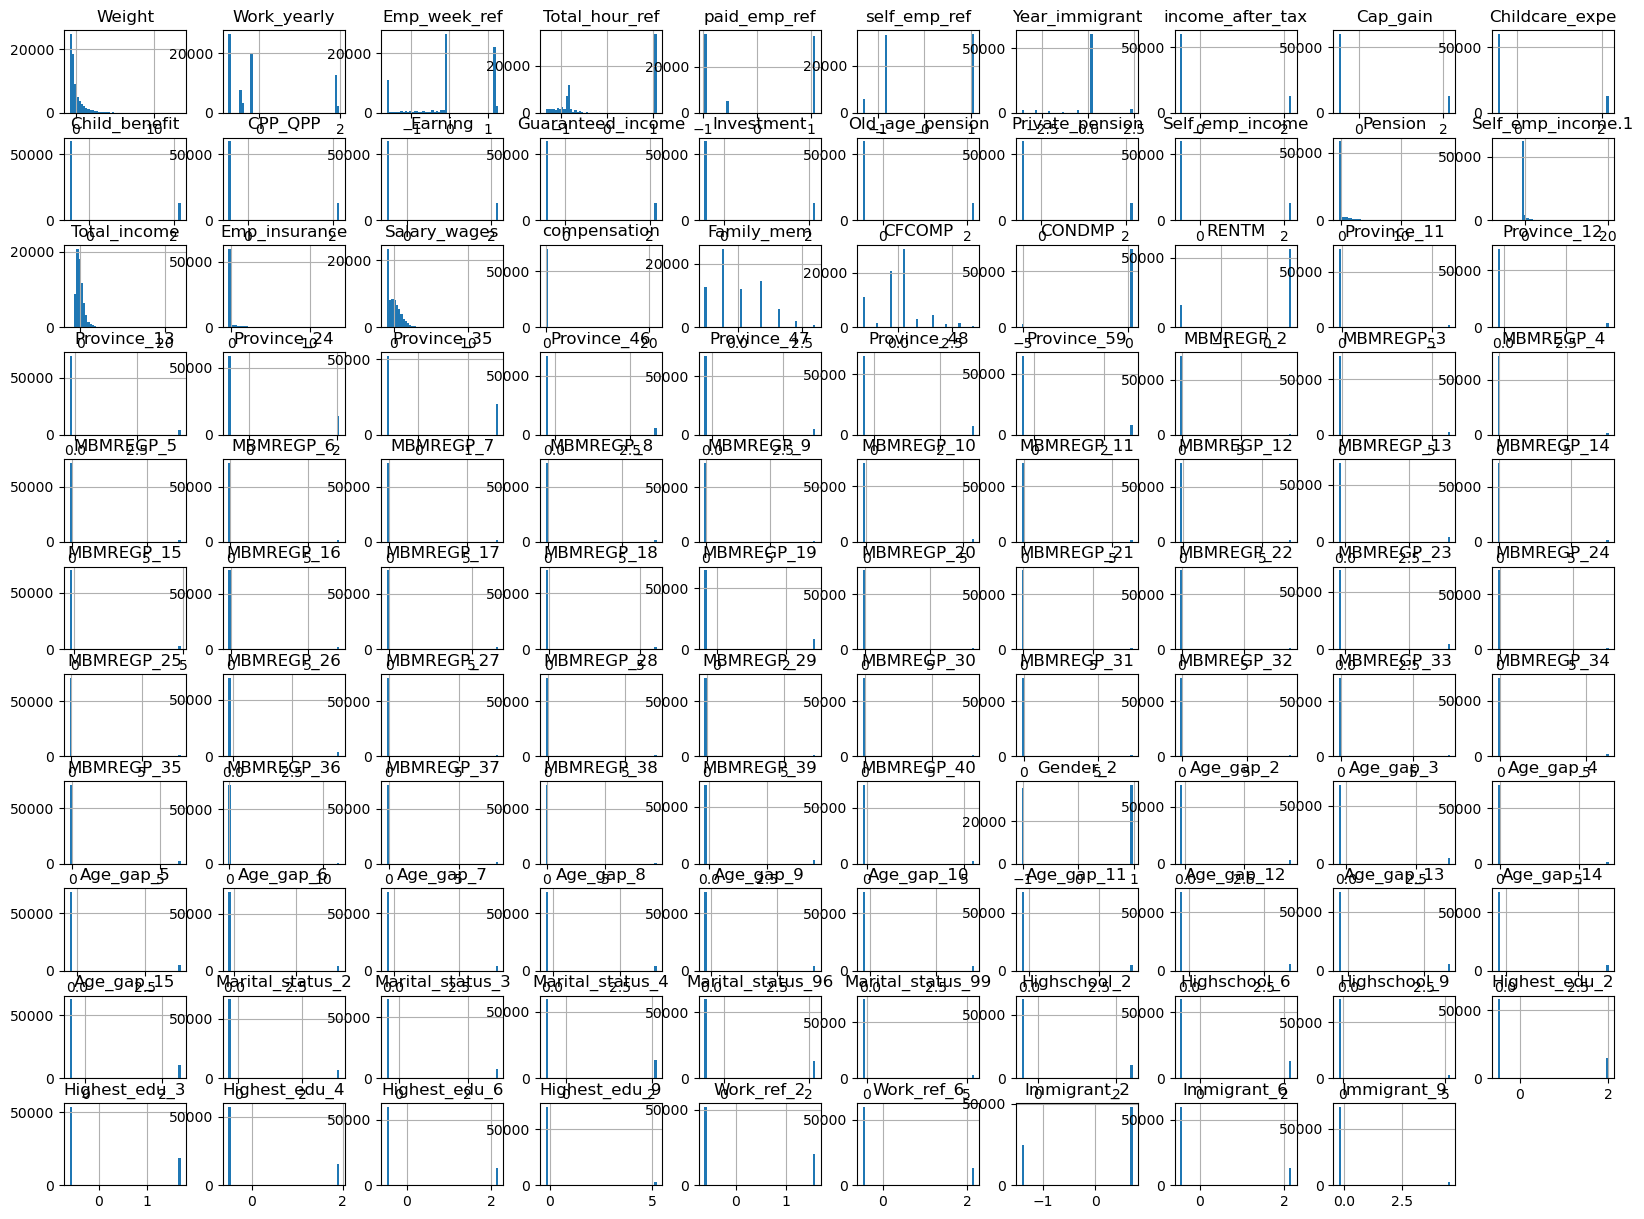

In [47]:
df_scaled.hist(bins=50, figsize=(20,15))
plt.show()

# Projections

I perform two projection algorithms
1. PCA
2. tSNE

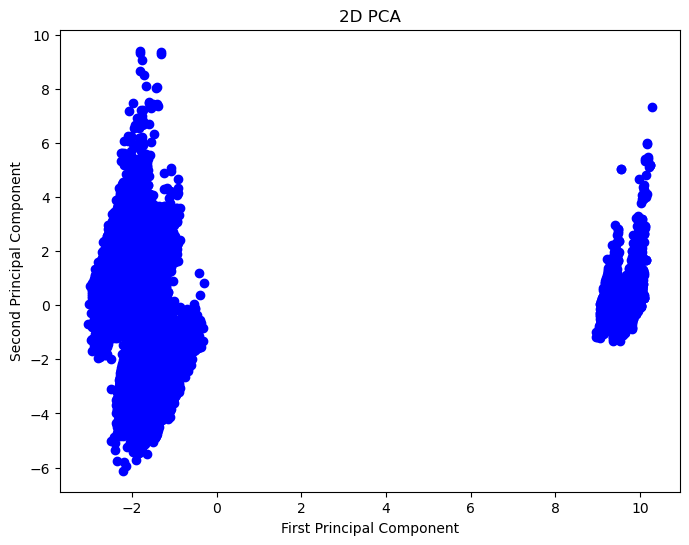

In [48]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA')
plt.show()


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 72643 samples in 0.020s...
[t-SNE] Computed neighbors for 72643 samples in 7.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 72643
[t-SNE] Computed conditional probabilities for sample 2000 / 72643
[t-SNE] Computed conditional probabilities for sample 3000 / 72643
[t-SNE] Computed conditional probabilities for sample 4000 / 72643
[t-SNE] Computed conditional probabilities for sample 5000 / 72643
[t-SNE] Computed conditional probabilities for sample 6000 / 72643
[t-SNE] Computed conditional probabilities for sample 7000 / 72643
[t-SNE] Computed conditional probabilities for sample 8000 / 72643
[t-SNE] Computed conditional probabilities for sample 9000 / 72643
[t-SNE] Computed conditional probabilities for sample 10000 / 72643
[t-SNE] Computed conditional probabilities for sample 11000 / 72643
[t-SNE] Computed conditional probabilities for sample 12000 / 72643
[t-SNE] Computed conditional probabilities for sa

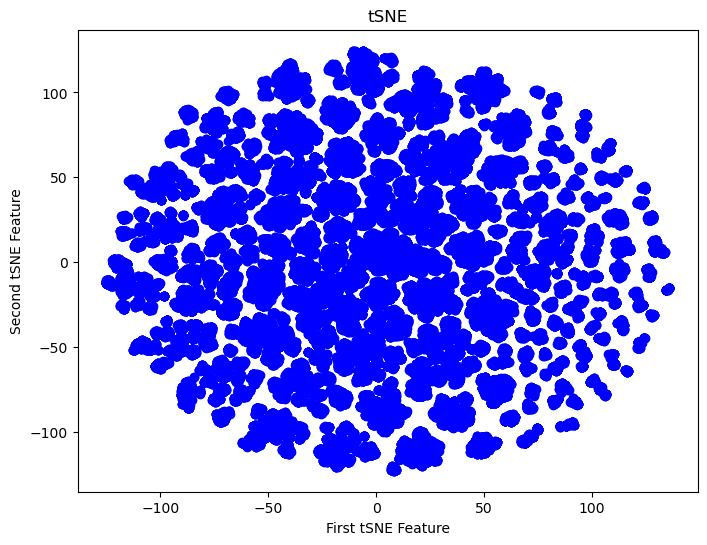

In [49]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50)
tsne_results = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(tsne_results[:,0], tsne_results[:,1], c='blue')
plt.xlabel('First tSNE Feature')
plt.ylabel('Second tSNE Feature')
plt.title('tSNE')
plt.show()

## kMEANS

For each projection I will create plots for k values 1-9. For each value it will create a plot, with the clusters colored, record the number of clusters, and the inertia and store it in an array which will be used later. 

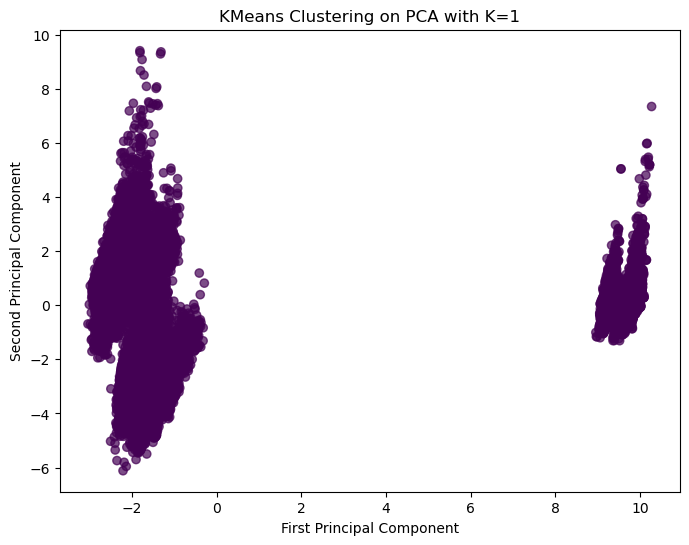

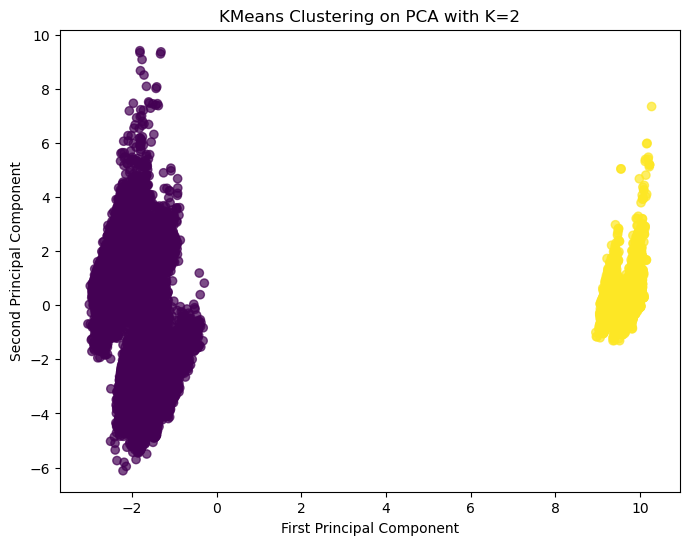

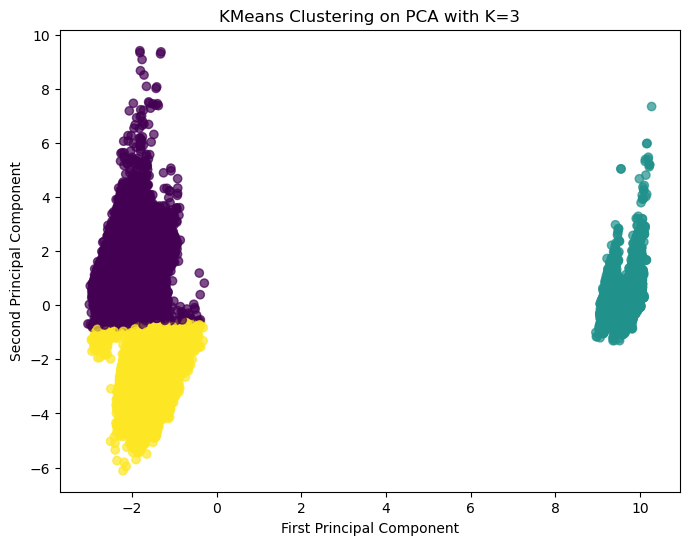

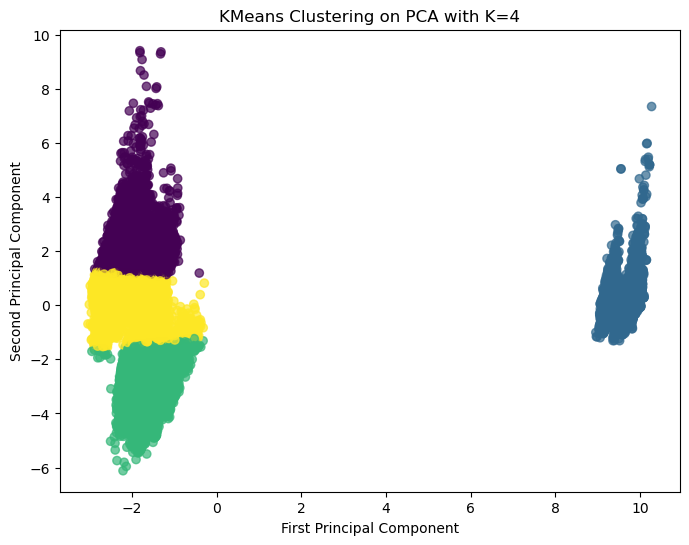

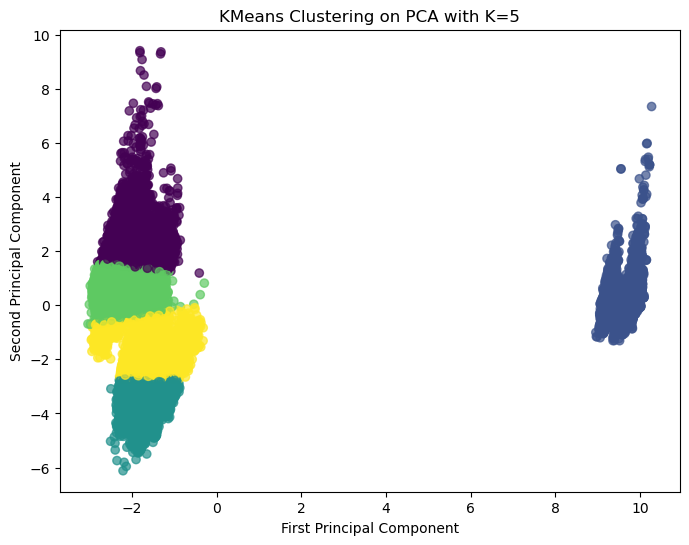

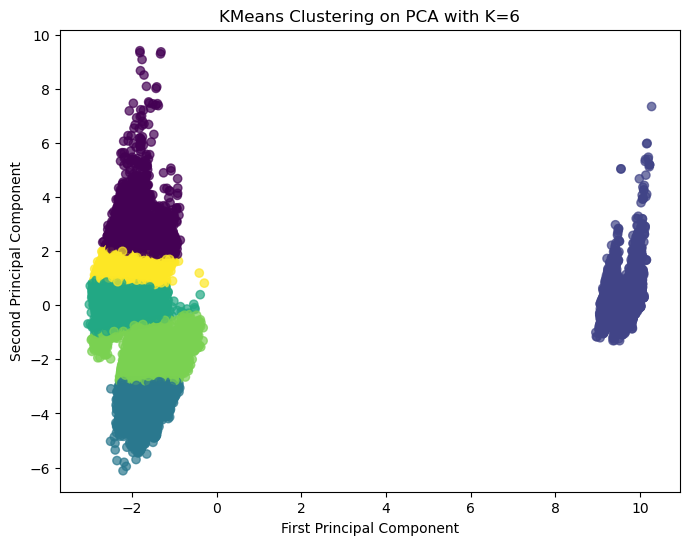

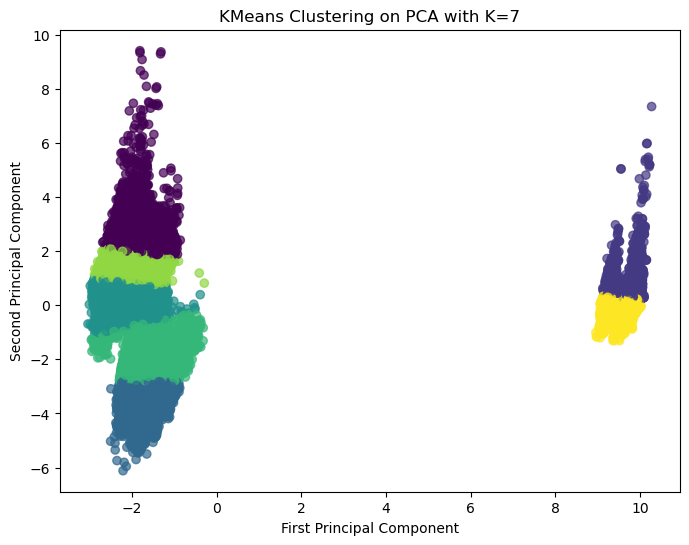

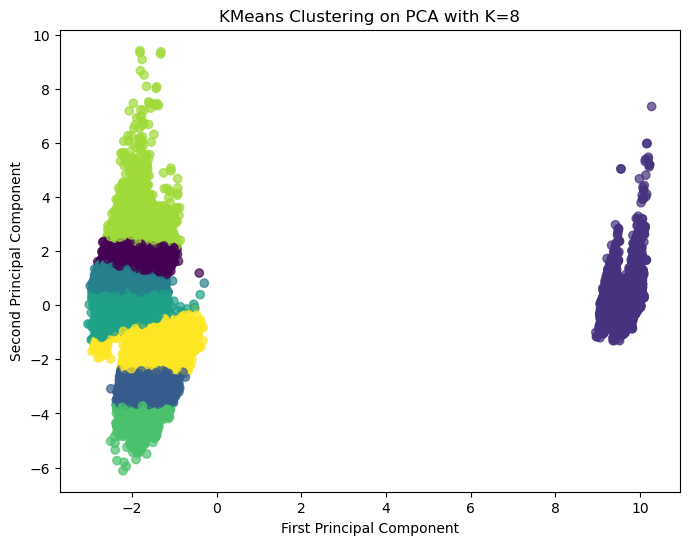

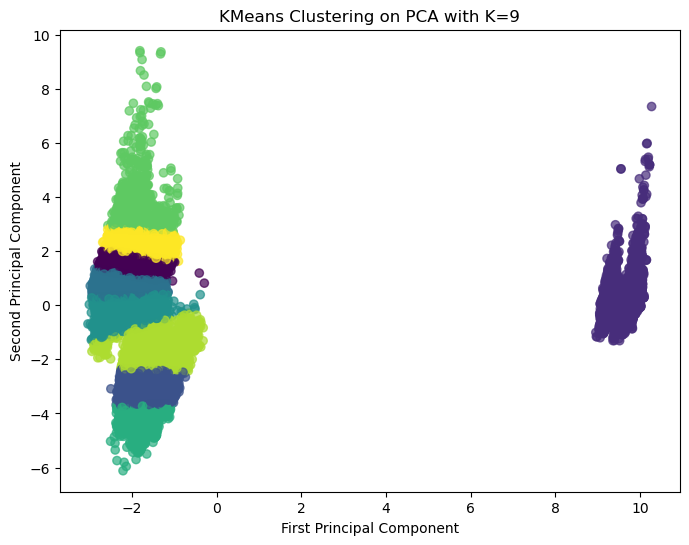

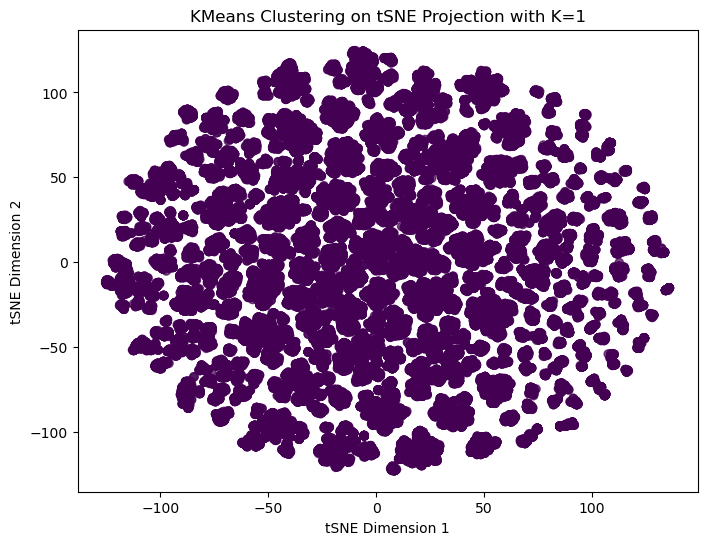

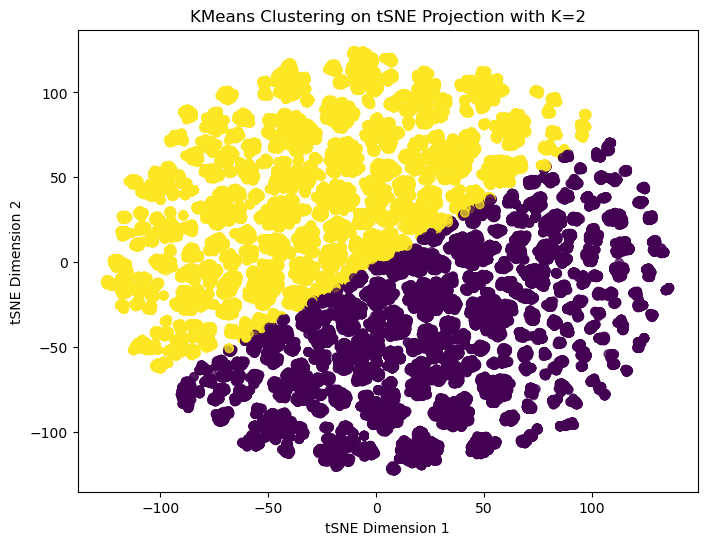

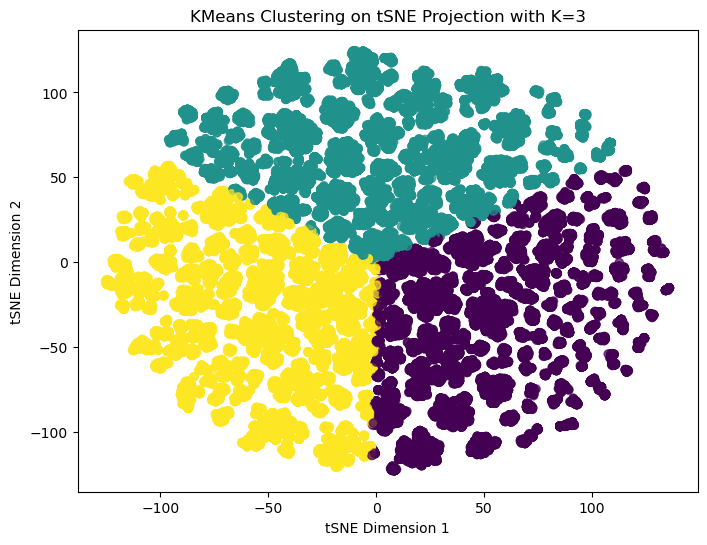

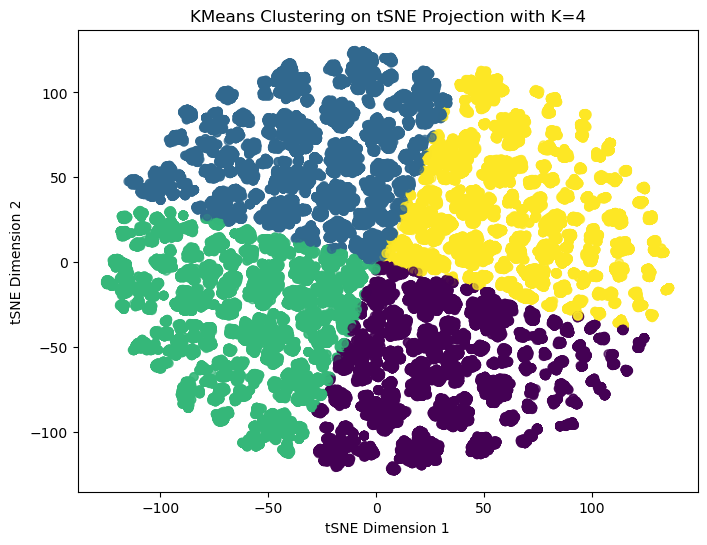

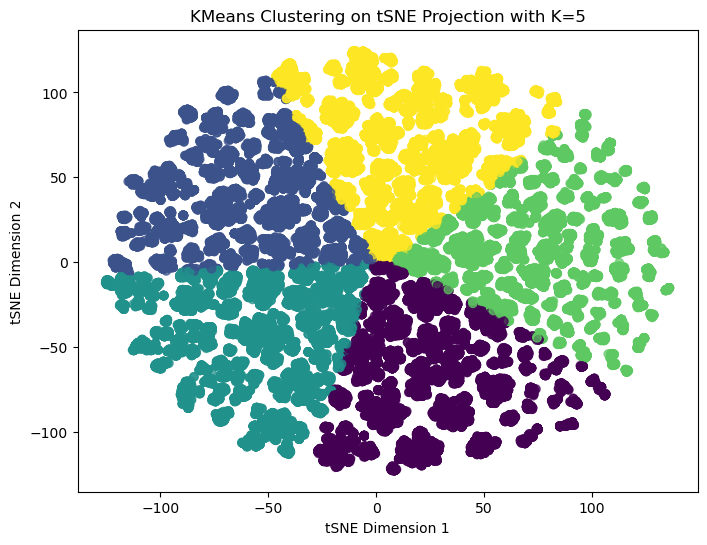

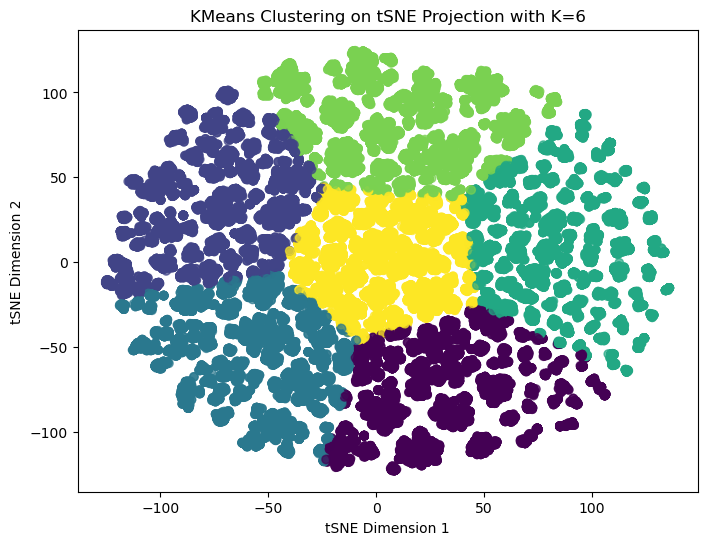

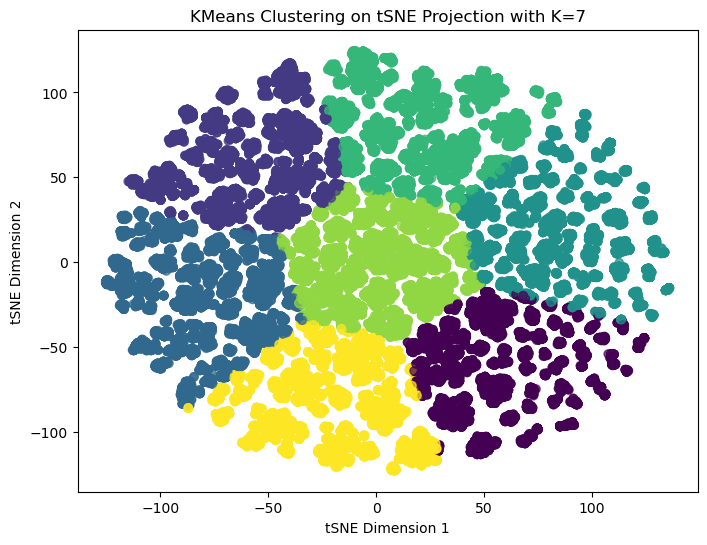

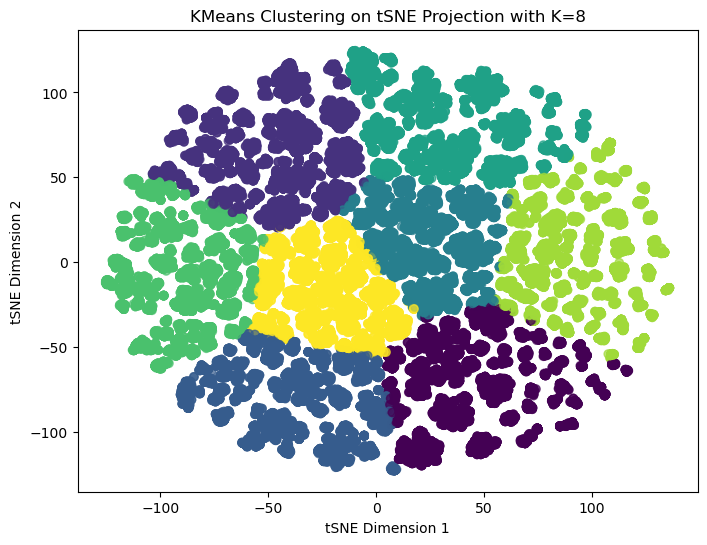

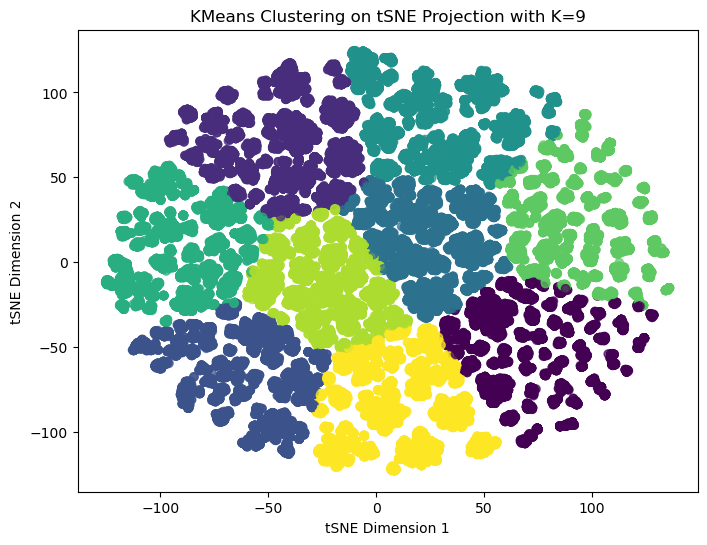

In [50]:
clusters_PCA = []
inertia_vals_PCA = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    clusters_PCA.append(i)
    inertia_vals_PCA.append(kmeans.inertia_)
    labels = kmeans.labels_
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('KMeans Clustering on PCA with K=%s' % i)
    plt.show()

clusters_tSNE = []
inertia_vals_tSNE = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(tsne_results)
    kmeans_labels = kmeans.labels_
    inertia = kmeans.inertia_
    clusters_tSNE.append(k)
    inertia_vals_tSNE.append(inertia)

    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
    plt.xlabel('tSNE Dimension 1')
    plt.ylabel('tSNE Dimension 2')
    plt.title('KMeans Clustering on tSNE Projection with K=%s' % k)
    plt.show()


Here I plot the inirtia values against the cluster numbers and use the elbow method to try and find an optimal number of clusters.

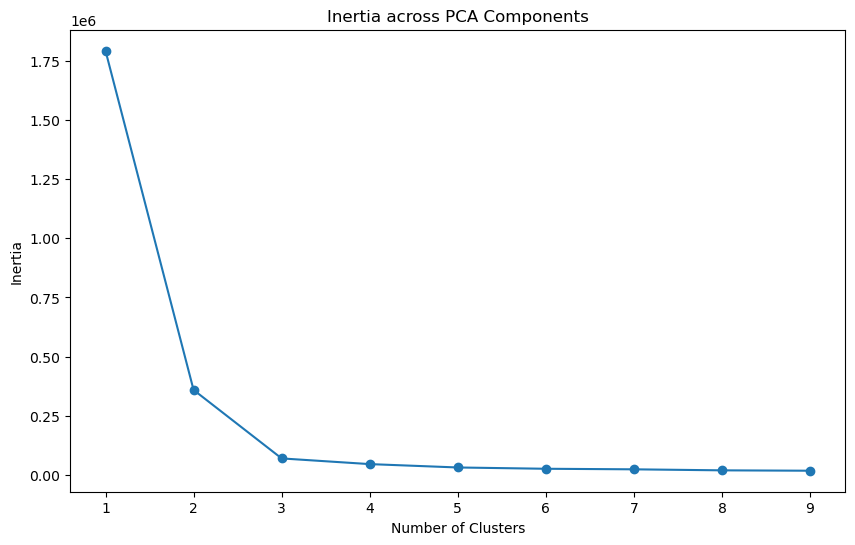

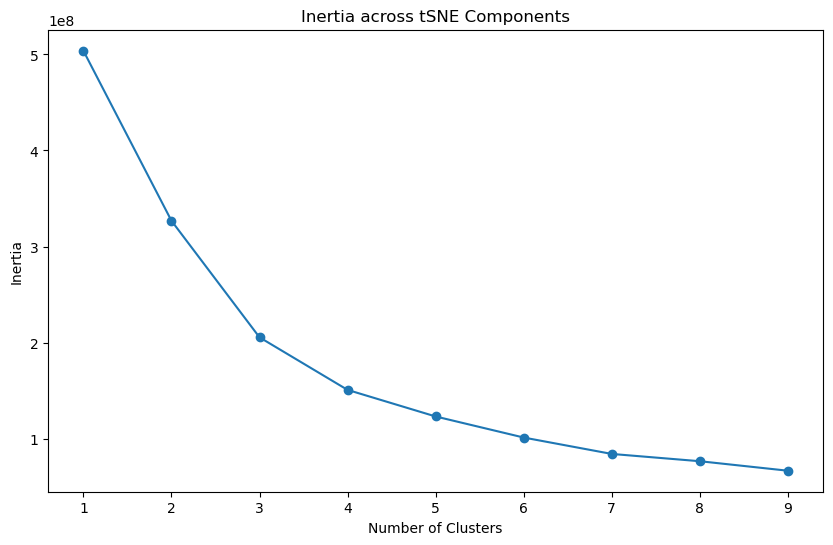

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(clusters_PCA, inertia_vals_PCA, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia across PCA Components')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(clusters_tSNE, inertia_vals_tSNE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia across tSNE Components')
plt.show()

Using the elbow method it seems that the best number of clusters for PCA is 2 and for tSNE is 3 

Next, I try to find the optimal number of clusters using the more rubust silhouette method

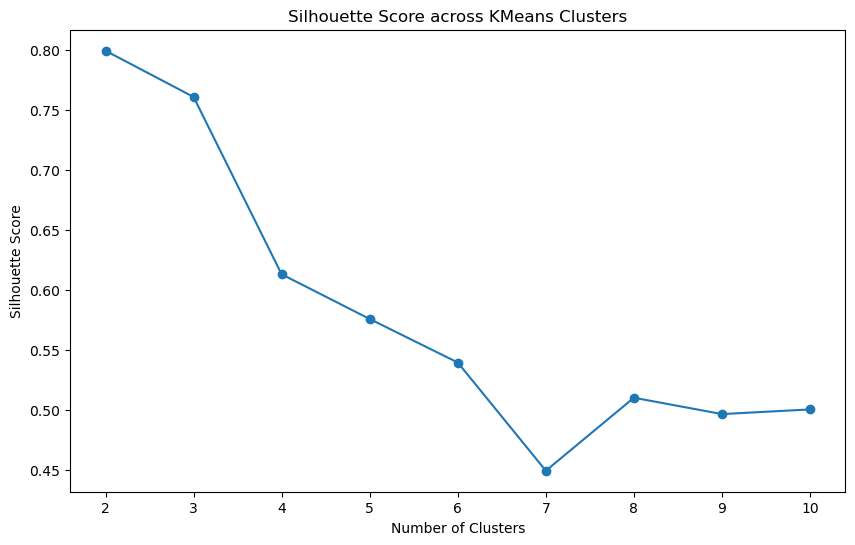

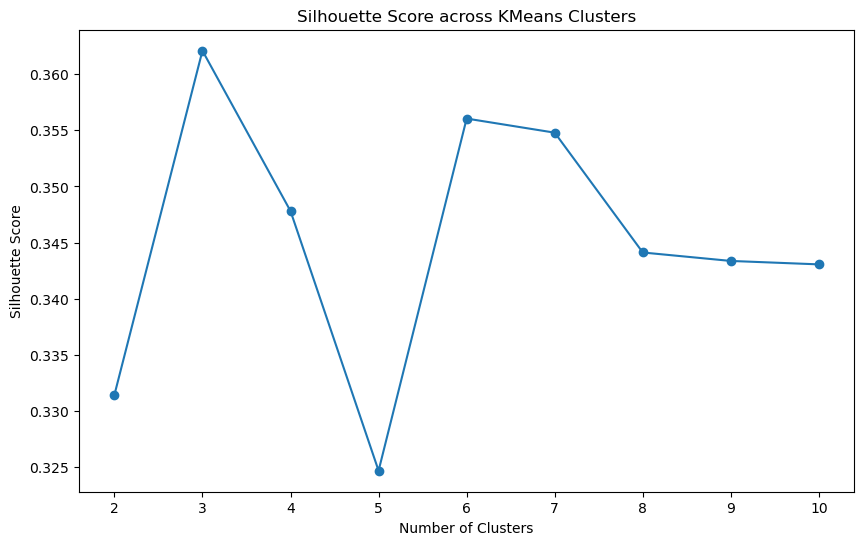

In [52]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score across KMeans Clusters')
plt.show()

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(tsne_results)
    score = silhouette_score(tsne_results, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score across KMeans Clusters')
plt.show()

Using the second method it seems again that 2 is the best number of clusters for PCA and 3 for TSNE

We will pick PCA with 3 clusters and tSNE with 3 clusters 

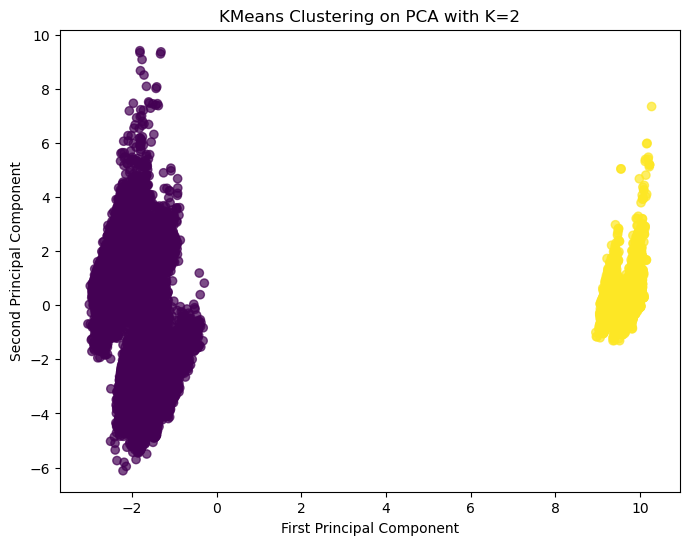

In [54]:
best_PCA_kmeans = KMeans(n_clusters=2, random_state=42)
best_PCA_kmeans.fit(X_pca)
best_PCA_kmeans_labels = best_PCA_kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_PCA_kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on PCA with K=2')
plt.show()

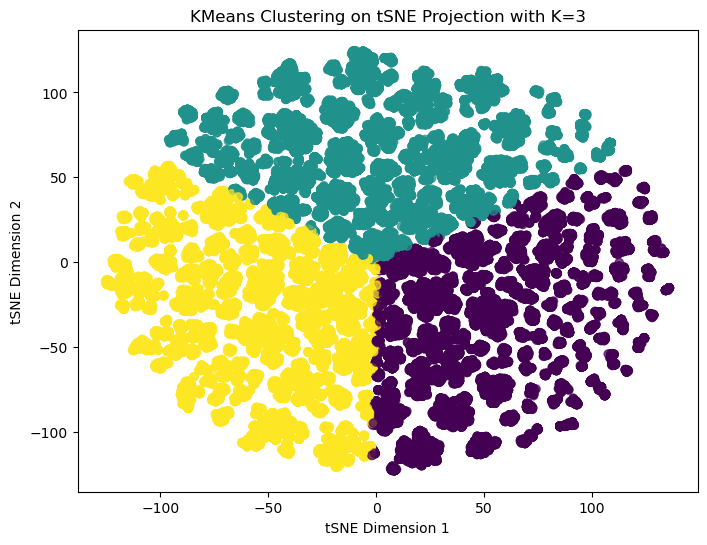

In [55]:
best_tSNE_kmeans = KMeans(n_clusters=3, random_state=42)
best_tSNE_kmeans.fit(tsne_results)
best_tSNE_kmeans_labels = best_tSNE_kmeans.labels_ 

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=best_tSNE_kmeans_labels, cmap='viridis', alpha=0.7)
plt.xlabel('tSNE Dimension 1')
plt.ylabel('tSNE Dimension 2')
plt.title('KMeans Clustering on tSNE Projection with K=3')
plt.show()

Find the centroids for the clusters in the original dataset

In [57]:
centroids_PCA = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(best_PCA_kmeans.cluster_centers_)), columns=df_encoded.columns[1:])
centroids_PCA

Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
0  507.903780    22.499744     46.880733     4529.376792      2.794109   
1  502.877177    96.855927     97.105859    10131.424320      6.074787   

   self_emp_ref  Year_immigrant  income_after_tax      Cap_gain  \
0      3.269377        5.737787      1.454026e+05  1.040475e+05   
1      6.064095        5.977182      9.951875e+07  9.951856e+07   

   Childcare_expe  ...  Highest_edu_2  Highest_edu_3  Highest_edu_4  \
0    1.035371e+05  ...       0.241837       0.317232       0.257491   
1    9.951856e+07  ...       0.000429      -0.004775       0.005860   

   Highest_edu_6  Highest_edu_9  Work_ref_2  Work_ref_6  Immigrant_2  \
0       0.001033       0.043247    0.340986    0.001033     0.809533   
1       0.995185      -0.001233    0.020182    0.995185    -0.022232   

   Immigrant_6  Immigrant_9  
0     0.001033     0.052926  
1     0.995185     0.009607  

[2 rows x 109 columns]

In [58]:
centroids_tSNE = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(best_tSNE_kmeans.cluster_centers_)), columns=df_encoded.columns[1:])
centroids_tSNE

Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
0  -645.310636   459.386958    338.610120    81944.411768     48.451812   
1  2572.698776   -69.079605     -8.797973   -83894.498350    -49.578366   
2  -416.589919  -263.930394   -149.426820    20327.864101     12.316358   

   self_emp_ref  Year_immigrant  income_after_tax      Cap_gain  \
0     41.914322        8.014252      4.733981e+08  4.737214e+08   
1    -40.888039        3.849317      8.042213e+07  8.010491e+07   
2     11.171475        5.546267     -4.755762e+08 -4.756729e+08   

   Childcare_expe  ...  Highest_edu_2  Highest_edu_3  Highest_edu_4  \
0    4.737163e+08  ...      -0.897672      -1.506104      -2.159296   
1    8.011776e+07  ...       0.028200       0.588054       2.286398   
2   -4.756818e+08  ...       1.406046       1.615316       0.438662   

   Highest_edu_6  Highest_edu_9  Work_ref_2  Work_ref_6  Immigrant_2  \
0       4.737210      -0.189214    4.945251    4.737210    -2.619905   
1       0.801109       0.045111  -11.152212    0.801109    -0.836542   
2      -4.756802       0.238853    7.027484   -4.756802     5.238013   

   Immigrant_6  Immigrant_9  
0     4.737210    -0.501129  
1     0.801109     0.655022  
2    -4.756802    -0.031798  

[3 rows x 109 columns]

In [61]:
kmeans_original = KMeans(n_clusters=2, random_state=42)  
kmeans_original.fit(df_scaled)
kmeans_centroids_original = pd.DataFrame(kmeans_original.cluster_centers_, columns=df_scaled.columns)
kmeans_centroids_original.index.name = 'Cluster'

print("\nKMeans Centroids (Original Features):")
print(kmeans_centroids_original)

kmeans_feature_variance_original = kmeans_centroids_original.var(axis=0).sort_values(ascending=False)
print("\nFeatures that differentiate KMeans clusters (sorted by variance):")
print(kmeans_feature_variance_original)


KMeans Centroids (Original Features):
           Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
Cluster                                                                      
0       -0.155924    -0.279480     -0.376149       -0.275057     -0.260060   
1        0.005721     0.010254      0.013801        0.010092      0.009542   

         self_emp_ref  Year_immigrant  income_after_tax  Cap_gain  \
Cluster                                                             
0           -0.248728       -0.231696         -0.463312 -0.463110   
1            0.009126        0.008501          0.016999  0.016992   

         Childcare_expe  ...  Highest_edu_2  Highest_edu_3  Highest_edu_4  \
Cluster                  ...                                                
0             -0.463102  ...      -0.498761      -0.593318      -0.520325   
1              0.016992  ...       0.018300       0.021769       0.019091   

         Highest_edu_6  Highest_edu_9  Work_ref_2  Work_ref_6 

Its a bit hard to extract the most predictive features since there are so many but it seems that education makes up most of the top predictive features

## DBSCAN

Now I will perform clustering with DBSCAN

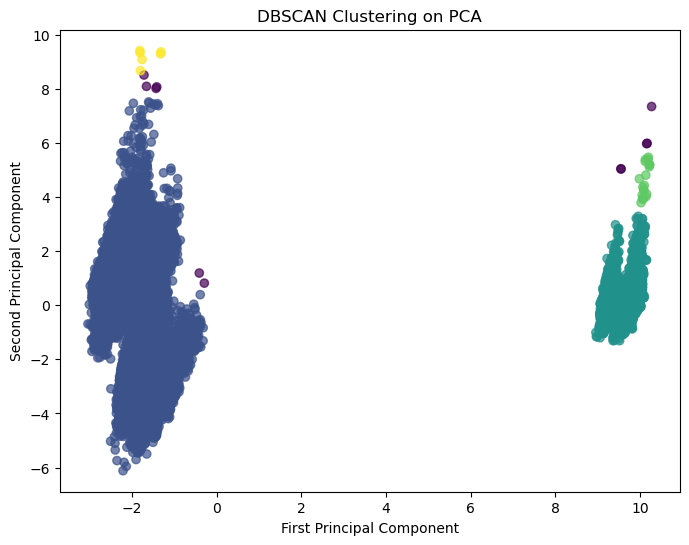

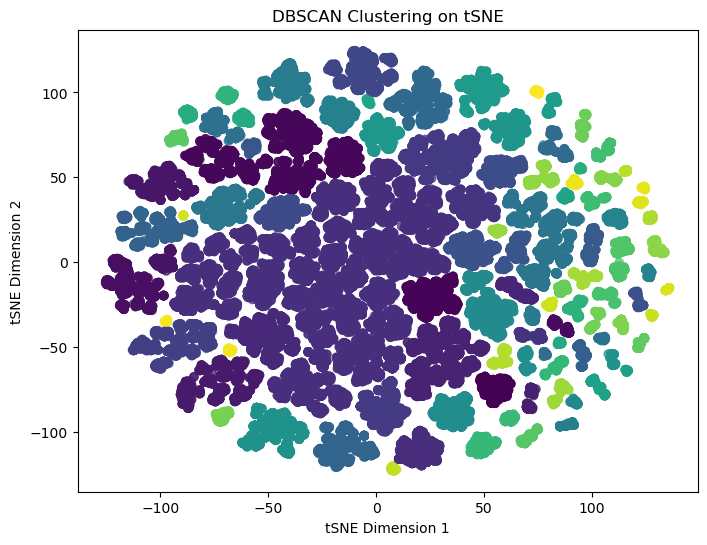

In [63]:
dbscan_PCA = DBSCAN(eps=0.5, min_samples=5)
dbscan_PCA.fit(X_pca)
dbscan_PCA_labels = dbscan_PCA.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_PCA_labels, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DBSCAN Clustering on PCA')
plt.show()

dbscan_tSNE = DBSCAN(eps=5, min_samples=5)
dbscan_tSNE.fit(tsne_results)
dbscan_tSNE_labels = dbscan_tSNE.labels_

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=dbscan_tSNE_labels, cmap='viridis', alpha=0.7)
plt.xlabel('tSNE Dimension 1')
plt.ylabel('tSNE Dimension 2')
plt.title('DBSCAN Clustering on tSNE')
plt.show()

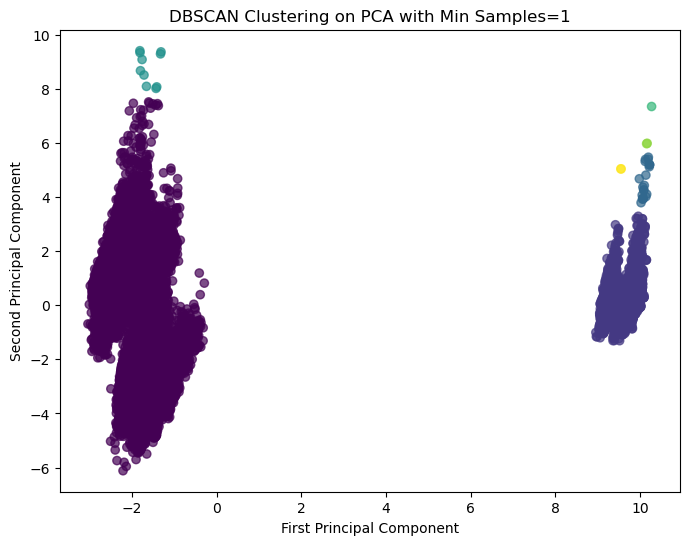

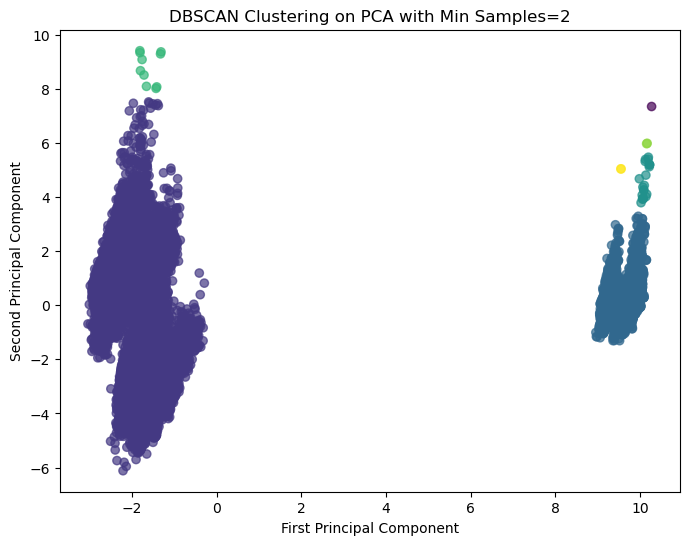

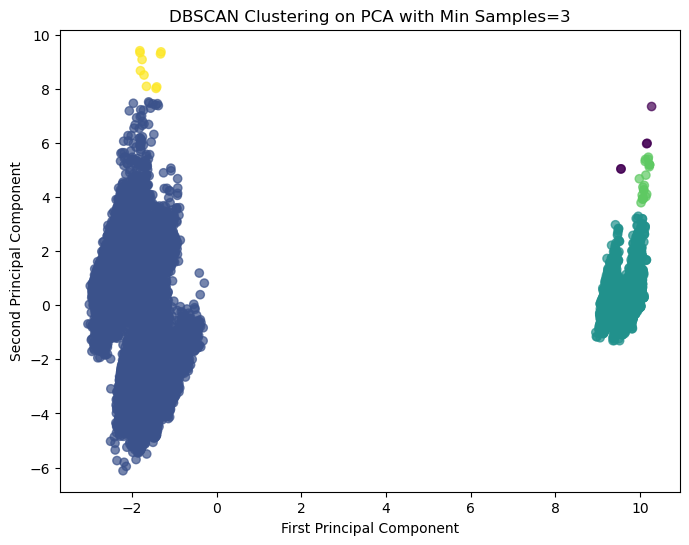

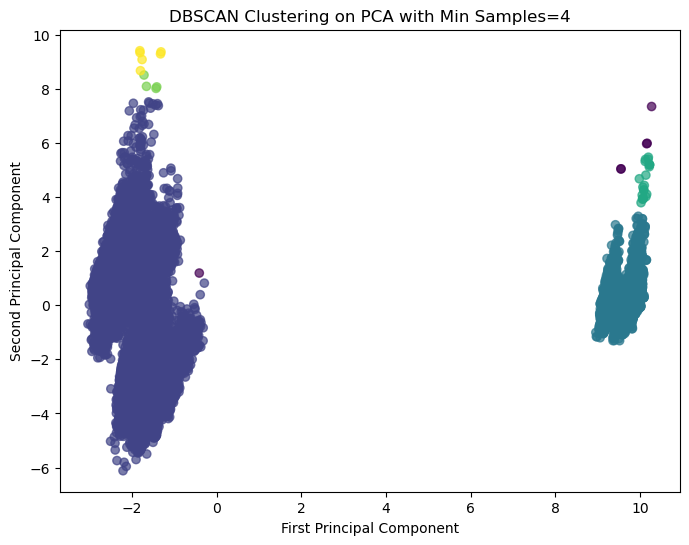

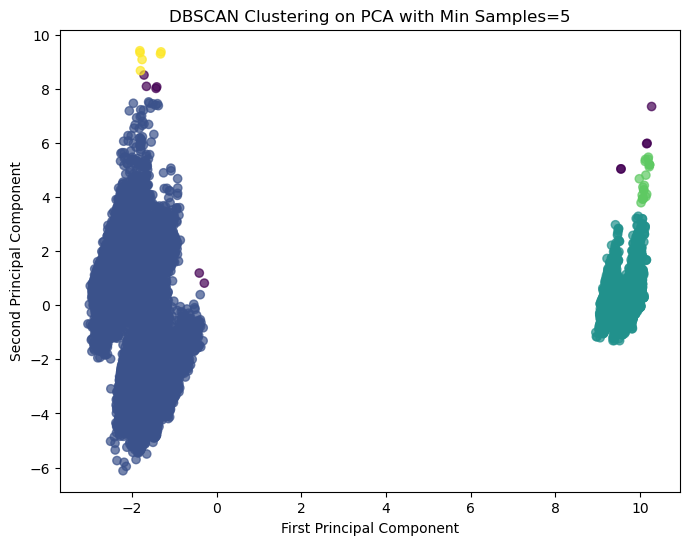

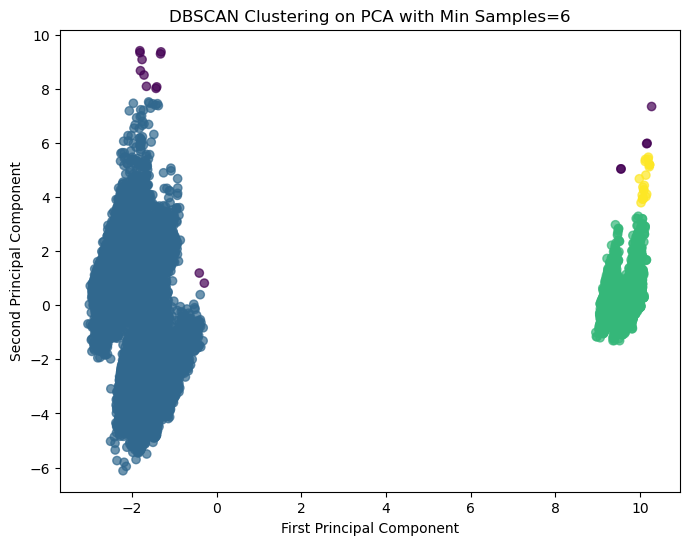

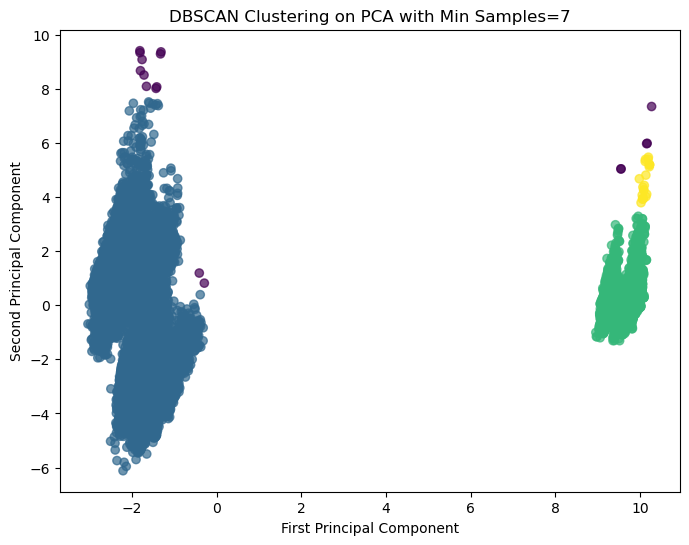

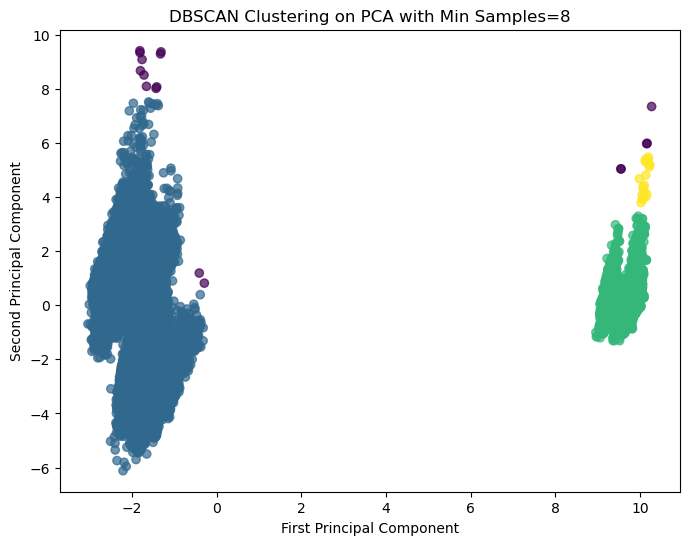

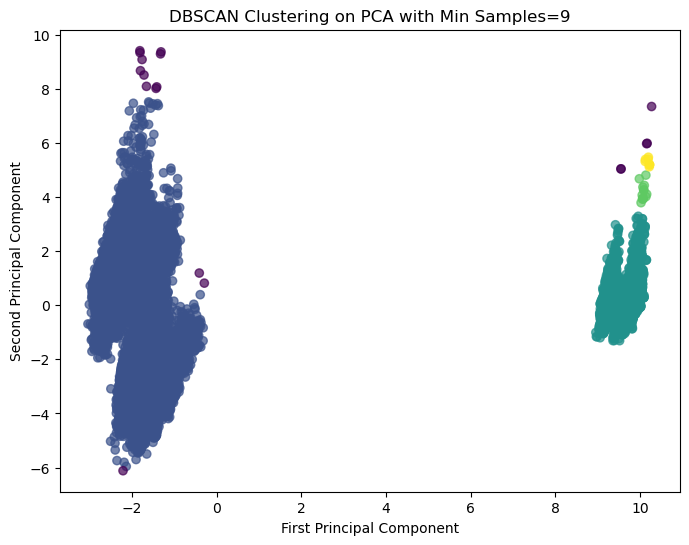

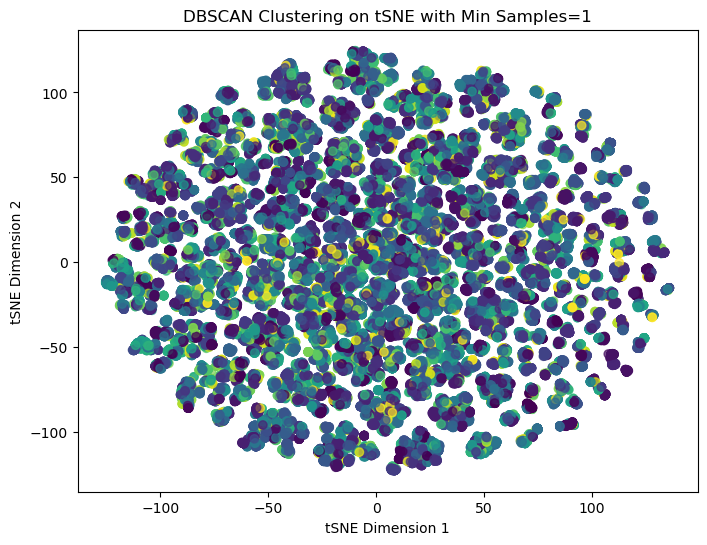

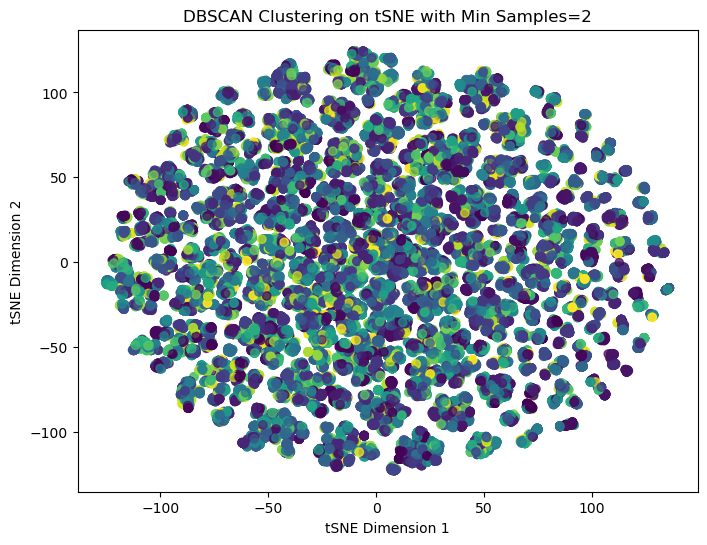

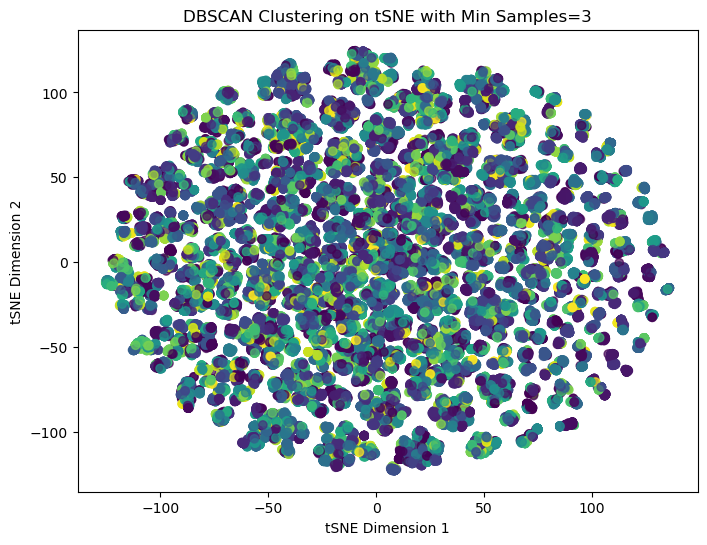

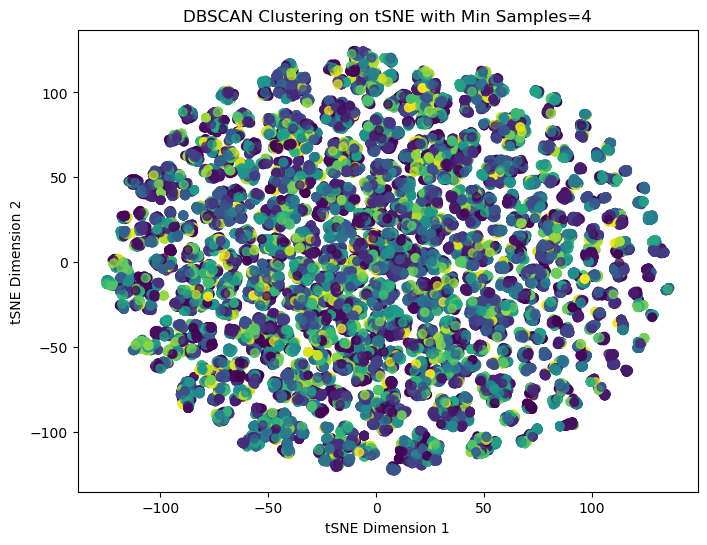

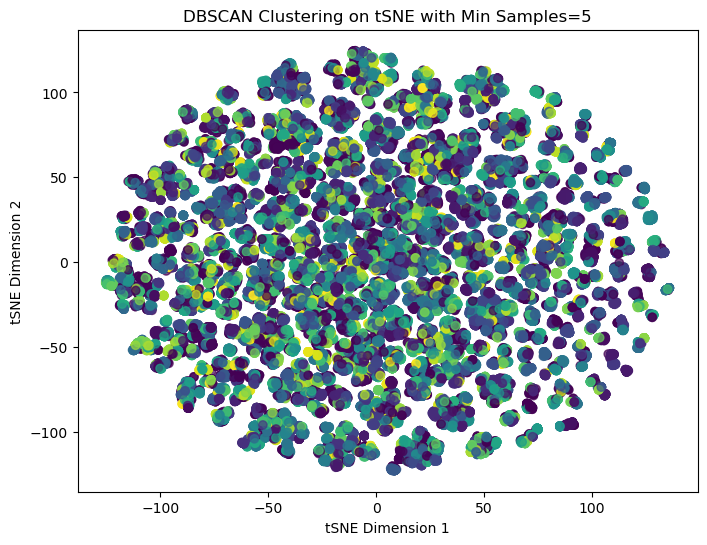

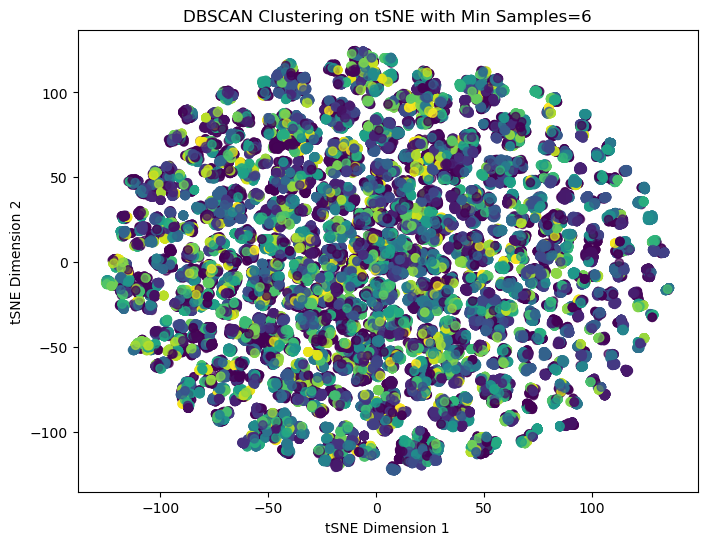

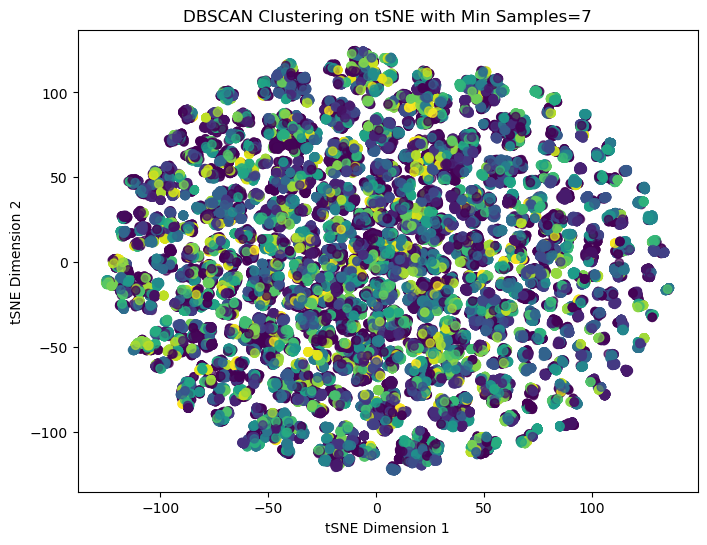

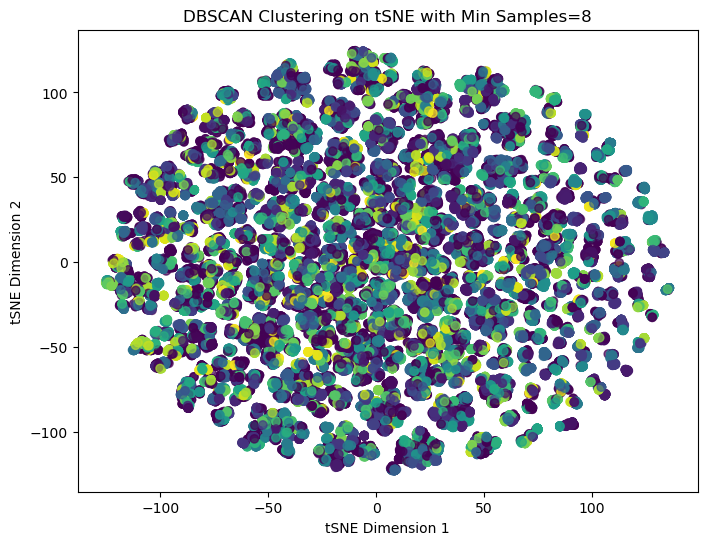

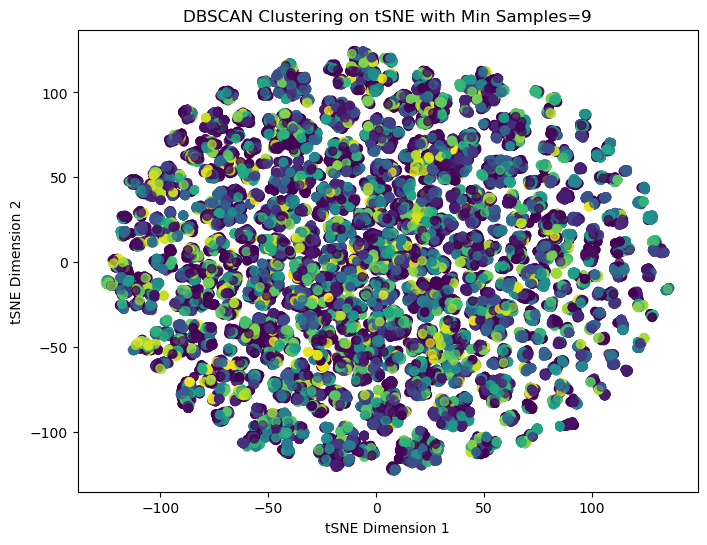

In [64]:
min_samples = []
inirtia_vals_pca = []
for i in range(1, 10):
    dbscan = DBSCAN(eps=0.5, min_samples=i)
    dbscan.fit(X_pca)
    min_samples.append(i)
    inirtia_vals_pca.append(dbscan.labels_)
    labels = dbscan.labels_
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('DBSCAN Clustering on PCA with Min Samples=%s' % i)
    plt.show()

min_samples_tsne = []
inirtia_vals_tsne = []
for i in range(1, 10):
    dbscan = DBSCAN(eps=0.5, min_samples=i)
    dbscan.fit(tsne_results)
    min_samples_tsne.append(i)
    inirtia_vals_tsne.append(dbscan.labels_)
    labels = dbscan.labels_
    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.xlabel('tSNE Dimension 1')
    plt.ylabel('tSNE Dimension 2')
    plt.title('DBSCAN Clustering on tSNE with Min Samples=%s' % i)
    plt.show()

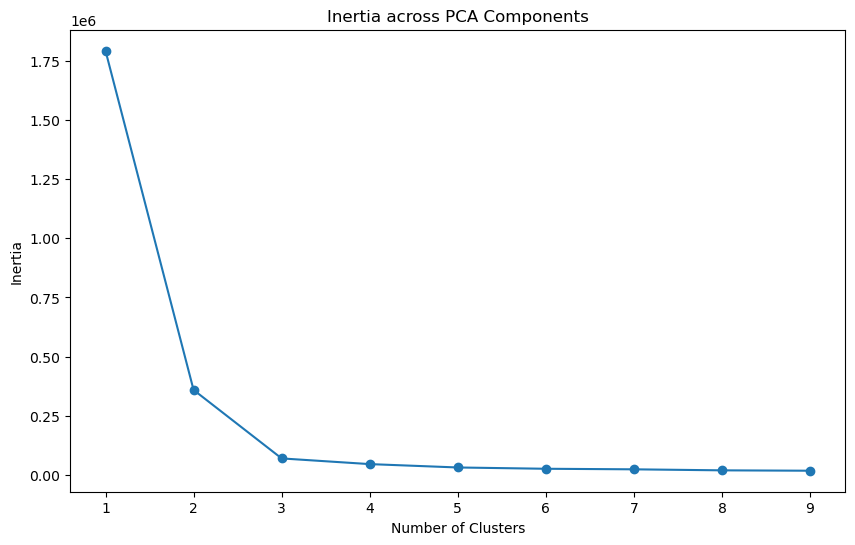

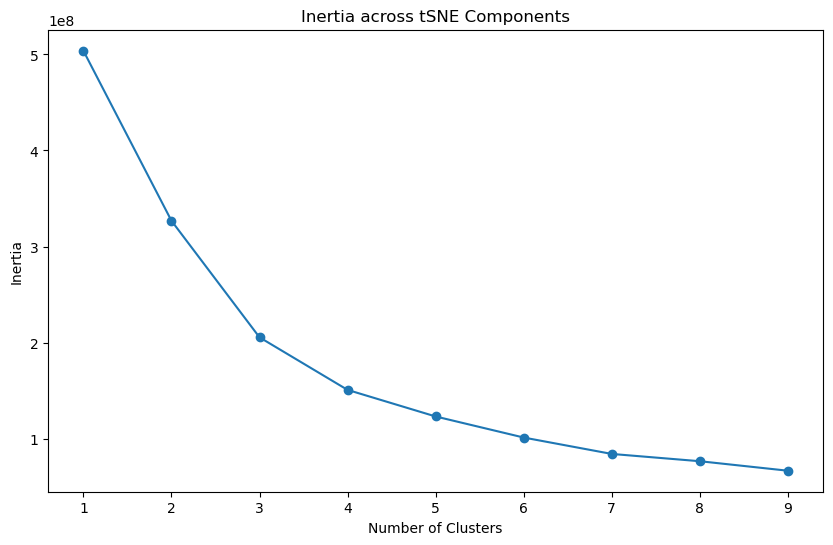

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, inertia_vals_PCA, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia across PCA Components')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(min_samples_tsne, inertia_vals_tSNE, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia across tSNE Components')
plt.show()

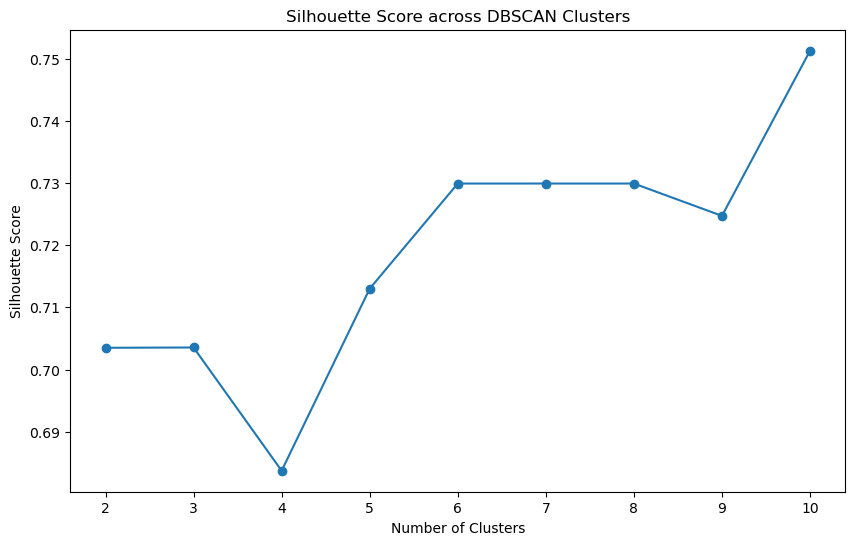

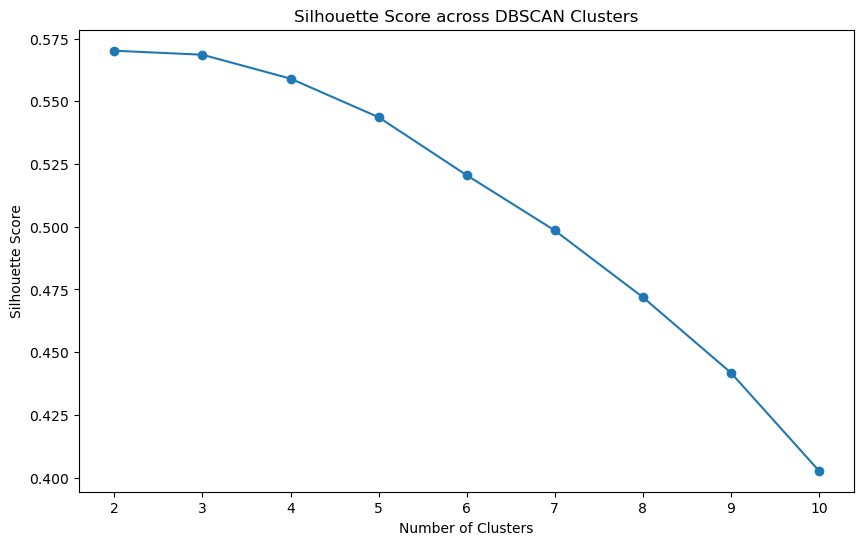

In [66]:
silhouette_scores_pca = []
for i in range(2, 11):
    dbscan = DBSCAN(eps=0.5, min_samples=i)
    dbscan.fit(X_pca)
    score = silhouette_score(X_pca, dbscan.labels_)
    silhouette_scores_pca.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_pca, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score across DBSCAN Clusters')
plt.show()

silhouette_scores_tsne = []
for i in range(2, 11):
    dbscan = DBSCAN(eps=0.5, min_samples=i)
    dbscan.fit(tsne_results)
    score = silhouette_score(tsne_results, dbscan.labels_)
    silhouette_scores_tsne.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_tsne, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score across DBSCAN Clusters')
plt.show()

It seems that the best value for min_samples is 10 for PCA and 2 is the best for TSNE. 

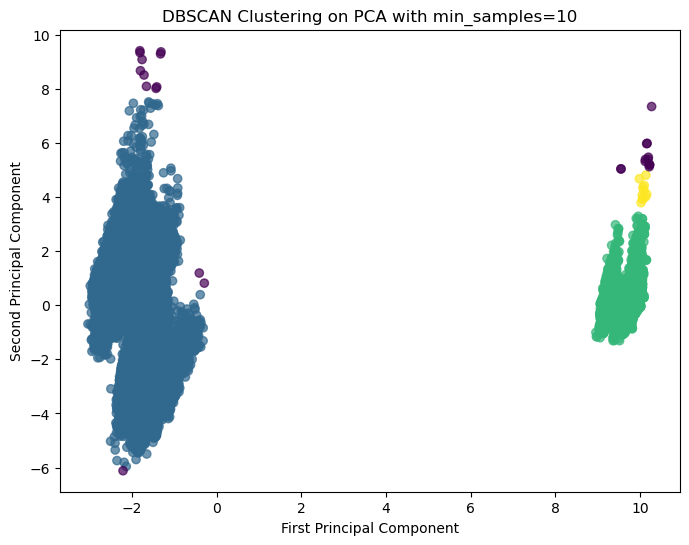

In [67]:
best_PCA_db = DBSCAN(eps=0.5, min_samples=10)
best_PCA_db.fit(X_pca)
best_PCA_db_labels = best_PCA_db.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_PCA_db_labels, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('DBSCAN Clustering on PCA with min_samples=10')
plt.show()

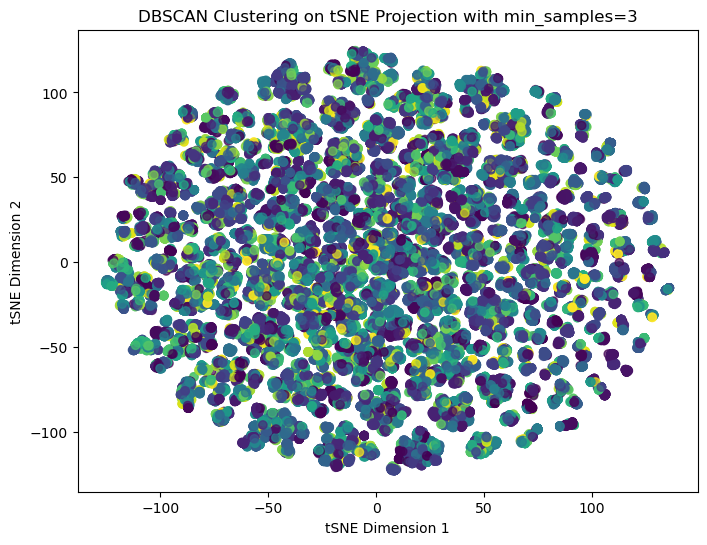

In [68]:
best_tSNE_db = DBSCAN(eps=0.5, min_samples=2)
best_tSNE_db.fit(tsne_results)
best_tSNE_db_labels = best_tSNE_db.labels_ 

plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=best_tSNE_db_labels, cmap='viridis', alpha=0.7)
plt.xlabel('tSNE Dimension 1')
plt.ylabel('tSNE Dimension 2')
plt.title('DBSCAN Clustering on tSNE Projection with min_samples=3')
plt.show()

In [72]:
# Extract the most predictive features

dbscan_original = DBSCAN(eps=0.5, min_samples=3)
dbscan_original.fit(df_scaled)
dbscan_centroids_original = pd.DataFrame(dbscan_original.components_, columns=df_scaled.columns)
dbscan_centroids_original.index.name = 'Cluster'

print("\nDBSCAN Centroids (min_samples = 3) (Original Features):")
print(dbscan_centroids_original)


DBSCAN Centroids (min_samples = 3) (Original Features):
           Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
Cluster                                                                      
0       -0.406412     1.883027      1.184708        1.072182      1.075995   
1        0.050450    -0.175617      1.184708        1.072182      1.075995   
2       -0.593189    -0.175617      1.184708        1.072182      1.075995   
3       -0.241014    -0.175617      1.184708        1.072182      1.075995   
4       -0.666471    -0.175617      1.184708        1.072182      1.075995   
...           ...          ...           ...             ...           ...   
6195    -0.299448    -0.768257     -0.110376       -0.823443     -0.972304   
6196    -0.745721    -0.768257     -0.110376       -0.823443     -0.972304   
6197    -0.220646    -0.175617      1.184708        1.072182      1.075995   
6198    -0.487502    -0.175617      1.184708        1.072182      1.075995   
6199   

In [73]:
dbscan_original = DBSCAN(eps=0.5, min_samples=10)
dbscan_original.fit(df_scaled)
dbscan_centroids_original = pd.DataFrame(dbscan_original.components_, columns=df_scaled.columns)
dbscan_centroids_original.index.name = 'Cluster'

print("\nDBSCAN Centroids (min_samples = 10) (Original Features):")
print(dbscan_centroids_original)



DBSCAN Centroids (min_samples = 10) (Original Features):
           Weight  Work_yearly  Emp_week_ref  Total_hour_ref  paid_emp_ref  \
Cluster                                                                      
0       -0.540700    -0.175617      1.184708        1.072182      1.075995   
1       -0.680180    -0.175617      1.184708        1.072182      1.075995   
2       -0.620284    -0.175617      1.184708        1.072182      1.075995   
3       -0.494130    -0.175617      1.184708        1.072182      1.075995   
4       -0.628782    -0.175617      1.184708        1.072182      1.075995   
...           ...          ...           ...             ...           ...   
686     -0.627378    -0.175617      1.184708        1.072182      1.075995   
687     -0.571681     1.883027      1.184708        1.072182      1.075995   
688     -0.571681     1.883027      1.184708        1.072182      1.075995   
689     -0.502667     1.883027      1.184708        1.072182      1.075995   
690   

KMeans clustering is a better clustering model for this dataset. 